In [1]:
# Import requisite packages
import matplotlib
matplotlib.use('Agg') # Run before importing matplotlib.pyplot or pylab!
import matplotlib.pyplot as plt
import hddm
import pandas as pd
import pickle
from patsy import dmatrix
from kabuki.analyze import gelman_rubin
from kabuki.utils import concat_models
import pathlib
import numpy as np
import warnings

In [2]:
# Get around a problem with saving regression outputs in Python 3
def savePatch(self, fname):
    import pickle
    with open(fname, 'wb') as f:
        pickle.dump(self, f)
hddm.HDDM.savePatch = savePatch


In [3]:
print(hddm.__version__)

0.9.7


In [14]:
# Load data from csv file into a NumPy structured array
data = hddm.load_csv('DDM_data_tms.csv')  # Change this!
data.visit.unique()

array([1, 2, 3, 4])

In [5]:
data.cond.unique()

array(['Dual', 'Delay', 'Switch', 'Base'], dtype=object)

In [15]:
data = data[data.visit == 3]
data

,subj_idx,visit,response,rt,acc,cond,ctrl
382,0,3,1.0,1.5101,1,Dual,HH
383,0,3,1.0,0.9363,1,Dual,HH
384,0,3,0.0,0.9965,1,Dual,HH
385,0,3,1.0,0.8667,1,Dual,HH
386,0,3,1.0,1.4764,1,Dual,HH
...,...,...,...,...,...,...,...
12851,16,3,1.0,0.5220,1,Base,LL
12852,16,3,0.0,0.3382,1,Base,LL
12853,16,3,0.0,0.3764,1,Base,LL
12854,16,3,1.0,0.4974,1,Base,LL


In [16]:
# Name this model
modelName = 'm04_va_visit3'  # Change this!

In [8]:
# Check whether save directories exist; if not, create them
pathlib.Path('./Models/').mkdir(parents=True, exist_ok=True)
pathlib.Path('./Results/').mkdir(parents=True, exist_ok=True)
pathlib.Path('./Plots/' + modelName).mkdir(parents=True, exist_ok=True)

In [8]:
models = []
for i in range(5):
    m = hddm.HDDMRegressor(data,
        # Change this!
        {"v ~ C(cond, Treatment('Base'))",
        "a ~ C(cond, Treatment('Base'))"},
        group_only_regressors=True,
        p_outlier=.05,
        include={'z'})

    m.find_starting_values()
    m.sample(2200, burn=200, dbname='./Models/'+modelName+'_%s.db'%i, db='pickle')
#     m.savePatch('./Models/'+modelName+'_%s'%i)
    m.save('./Models/'+modelName+'_%s'%i)
    models.append(m)

No model attribute --> setting up standard HDDM
Set model to ddm


/Users/jongminlee/opt/anaconda3/envs/onlyhddm/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2201 of 2200 complete in 1202.7 secNo model attribute --> setting up standard HDDM
Set model to ddm


/Users/jongminlee/opt/anaconda3/envs/onlyhddm/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2201 of 2200 complete in 1211.5 secNo model attribute --> setting up standard HDDM
Set model to ddm


/Users/jongminlee/opt/anaconda3/envs/onlyhddm/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2201 of 2200 complete in 1219.5 secNo model attribute --> setting up standard HDDM
Set model to ddm


/Users/jongminlee/opt/anaconda3/envs/onlyhddm/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2201 of 2200 complete in 1217.0 secNo model attribute --> setting up standard HDDM
Set model to ddm


/Users/jongminlee/opt/anaconda3/envs/onlyhddm/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2201 of 2200 complete in 1208.2 sec

In [14]:
import os
print(os.getcwd())

/Users/jongminlee/Desktop/Files/nee_lab/DDM/tms


In [21]:
models=[]
# m0=hddm.load('./Models/m04_va_visit3_0')
# m1=hddm.load('./Models/m04_va_visit3_1')
# m2=hddm.load('./Models/m04_va_visit3_2')
# m3=hddm.load('./Models/m04_va_visit3_3')
# m4=hddm.load('./Models/m04_va_visit3_4')

modelName = 'm04_va_visit3'  # Change this!
for i in range(5):
    m=hddm.load('./Models/'+modelName+'_%s'%i)
    models.append(m)
    


In [9]:
# Calculate Gelman-Rubin r-hat statistic
m_rhat = gelman_rubin(models)
pd.DataFrame.from_dict(m_rhat, orient='index').to_csv('./Results/'+modelName+'_RHat.csv')


# Save traces of concatenated model (only valid to look at if converged!)
m_comb = concat_models(models)
m_comb_export = m_comb.get_traces()
m_comb_export.to_csv('./Results/'+modelName+'_traces.csv')

In [10]:
# List figures to be saved
# Change this!
convergeCheck = [
't', 't_std',
'z', 'z_std',

'v_Intercept', 'v_Intercept_std',
'a_Intercept', 'a_Intercept_std',

'v_C(cond, Treatment(\'Base\'))[T.Dual]',
'v_C(cond, Treatment(\'Base\'))[T.Delay]',
'v_C(cond, Treatment(\'Base\'))[T.Switch]',

'a_C(cond, Treatment(\'Base\'))[T.Dual]',
'a_C(cond, Treatment(\'Base\'))[T.Delay]',
'a_C(cond, Treatment(\'Base\'))[T.Switch]'
]

# Save convergence figures
for i in convergeCheck:
    fig = m_comb.plot_posteriors(i)
    plt.savefig('./Plots/' + modelName + '/' + i + '.pdf')



#####
#####  GET DIC
#####

print("DIC: %f" %m_comb.dic)

Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting a_Intercept
Plotting a_Intercept_std
Plotting v_C(cond, Treatment('Base'))[T.Dual]
Plotting v_C(cond, Treatment('Base'))[T.Delay]
Plotting v_C(cond, Treatment('Base'))[T.Switch]
Plotting a_C(cond, Treatment('Base'))[T.Dual]
Plotting a_C(cond, Treatment('Base'))[T.Delay]
Plotting a_C(cond, Treatment('Base'))[T.Switch]
DIC: 1798.613283


In [11]:
plt.close('all')

In [5]:
modelName = 'm04_va_visit3'  # Change this!
# Load previously estimated models
m0 = pickle.load(open('./Models/'+modelName+'_0', 'rb'))
m1 = pickle.load(open('./Models/'+modelName+'_1', 'rb'))
m2 = pickle.load(open('./Models/'+modelName+'_2', 'rb'))
m3 = pickle.load(open('./Models/'+modelName+'_3', 'rb'))
m4 = pickle.load(open('./Models/'+modelName+'_4', 'rb'))

# Combine traces
models = [m0, m1, m2, m3, m4]
m_comb = concat_models(models)
print("DIC: %f" %m_comb.dic)

DIC: 1798.613283


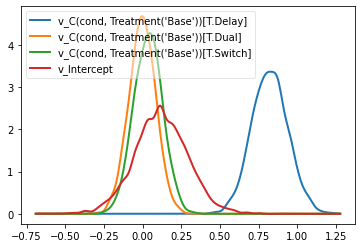

In [9]:
%matplotlib inline
regression_v_0 = m_comb.nodes_db.node[
    'v_C(cond, Treatment(\'Base\'))[T.Delay]'
]
regression_v_1 = m_comb.nodes_db.node[
    'v_C(cond, Treatment(\'Base\'))[T.Dual]'
]
regression_v_2 = m_comb.nodes_db.node[
    'v_C(cond, Treatment(\'Base\'))[T.Switch]'
]
regression_v_3 = m_comb.nodes_db.node[
    'v_Intercept'
]


# Plot posteriors
hddm.analyze.plot_posterior_nodes(
    [
     regression_v_0,
     regression_v_1,
     regression_v_2,
     regression_v_3
    ]
)

In [7]:
regression_a_0 = m_comb.nodes_db.node[
    'a_C(cond, Treatment(\'Base\'))[T.Delay]'
]
regression_a_1 = m_comb.nodes_db.node[
    'a_C(cond, Treatment(\'Base\'))[T.Dual]'
]
regression_a_2 = m_comb.nodes_db.node[
    'a_C(cond, Treatment(\'Base\'))[T.Switch]'
]

# Plot posteriors
hddm.analyze.plot_posterior_nodes(
    [
     regression_a_0,
     regression_a_1,
     regression_a_2
    ]
)

In [2]:
import pymc as pm
import numpy as np
import pymc.progressbar as pbar

def _parents_to_random_posterior_sample(bottom_node, pos=None):
    """Walks through parents and sets them to pos sample."""
    for i, parent in enumerate(bottom_node.extended_parents):
        if not isinstance(parent, pm.Node): # Skip non-stochastic nodes
            continue

        if pos is None:
            # Set to random posterior position
            pos = np.random.randint(0, len(parent.trace()))

        assert len(parent.trace()) >= pos, "pos larger than posterior sample size"
        parent.value = parent.trace()[pos]

def _post_pred_generate(bottom_node, samples=500, data=None, append_data=True):
    """Generate posterior predictive data from a single observed node."""
    datasets = []
    ##############################
    # Sample and generate stats
    for sample in range(samples):
        _parents_to_random_posterior_sample(bottom_node)
        # Generate data from bottom node
        sampled_data = bottom_node.random()
        sampled_data.reset_index(inplace=True)
        if append_data and data is not None:
            sampled_data = sampled_data.join(data.reset_index(), lsuffix='_sampled')
        datasets.append(sampled_data)
    return datasets

def post_pred_gen(model, groupby=None, samples=500, append_data=False, progress_bar=True):
    results = {}

    # Progress bar
    if progress_bar:
        n_iter = len(model.get_observeds())
        bar = pbar.progress_bar(n_iter)
        bar_iter = 0
    else:
        print("Sampling...")

    if groupby is None:
        iter_data = ((name, model.data.loc[obs['node'].value.index]) for name, obs in model.iter_observeds())
    else:
        iter_data = model.data.groupby(groupby)

    for name, data in iter_data:
        node = model.get_data_nodes(data.index)

        if progress_bar:
            bar_iter += 1
            bar.update(bar_iter)

        if node is None or not hasattr(node, 'random'):
            continue # Skip

        ##############################
        # Sample and generate stats
        datasets = _post_pred_generate(node, samples=samples, data=data, append_data=append_data)
        results[name] = pd.concat(datasets, names=['sample'], keys=list(range(len(datasets))))

    if progress_bar:
        bar_iter += 1
        bar.update(bar_iter)

    return pd.concat(results, names=['node'])


In [17]:
# Generate predicted results from previously-estimated models
# Normally, we'd want to get many, many samples - I've done 1000 in the past
# But, for the sake of time, let's just do a couple

ppc_data = post_pred_gen(m_comb, samples=1000, append_data=True)
ppc_data.to_csv('./PPC/'+modelName+'_simul_ppc-visit3.csv')
ppc_data

 [--------------------117%--------------------] 20 of 17 complete in 79.8 sec

index_sampled  rt_sampled  response_sampled  index  \
node    sample                                                           
wfpt.1  0      0                0   -0.860887                 0    382   
               1                1   -0.508890                 0    383   
               2                2   -0.805888                 0    384   
               3                3   -0.576891                 0    385   
               4                4   -0.448890                 0    386   
...                           ...         ...               ...    ...   
wfpt.17 999    187            187   -0.294527                 0  12851   
               188            188    0.873522                 1  12852   
               189            189    0.654525                 1  12853   
               190            190    0.436527                 1  12854   
               191            191    0.572526                 1  12855   

                    subj_idx  visit  response      rt  acc  cond ctrl  
node    sample                                                         
wfpt.1  0      0           1      3       1.0  1.5101    1  Dual   HH  
               1           1      3       1.0  0.9363    1  Dual   HH  
               2           1      3       0.0 -0.9965    1  Dual   HH  
               3           1      3       1.0  0.8667    1  Dual   HH  
               4           1      3       1.0  1.4764    1  Dual   HH  
...                      ...    ...       ...     ...  ...   ...  ...  
wfpt.17 999    187        17      3       1.0  0.5220    1  Base   LL  
               188        17      3       0.0 -0.3382    1  Base   LL  
               189        17      3       0.0 -0.3764    1  Base   LL  
               190        17      3       1.0  0.4974    1  Base   LL  
               191        17      3       1.0  0.7307    1  Base   LL  

[3264000 rows x 11 columns]

In [18]:
ppc_compare = hddm.utils.post_pred_stats(data, ppc_data, call_compare=False)
ppc_compare
ppc_compare.to_csv('./PPC/'+modelName+'_va_PPC_stats.csv')

In [19]:
hddm.utils.post_pred_stats(data, ppc_data)

,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis
stat,,,,,,,,
accuracy,0.548713,0.548713,0.151532,7.867601e-16,0.022962,True,35.294117,1.851050e-07
mean_ub,0.534539,0.538706,0.065176,1.736388e-05,0.004265,True,47.058823,6.393462e-02
std_ub,0.227302,0.217404,0.058530,9.797887e-05,0.003524,True,64.705879,1.691185e-01
10q_ub,0.313800,0.329909,0.052876,2.594950e-04,0.003055,True,41.176472,3.046533e-01
30q_ub,0.409500,0.420536,0.054863,1.218034e-04,0.003132,True,47.058823,2.011651e-01
50q_ub,0.494600,0.498238,0.059970,1.323676e-05,0.003610,True,41.176472,6.066743e-02
70q_ub,0.584100,0.575039,0.072592,8.210335e-05,0.005352,True,58.823528,1.248221e-01
90q_ub,0.788300,0.779185,0.143515,8.307784e-05,0.020680,True,64.705879,6.351058e-02
mean_lb,-0.537649,-0.528716,0.074946,7.979295e-05,0.005697,True,41.176472,1.191883e-01
